# Song Popularity prediction for Spotify Data

#### Executive Summary:
Spotify is the Swedish music streaming service that has become one of the most popular platforms in the world- especially for college students. As a group, we have always been interested in how songs become popular, and specifically how they get classified into popular/recommended playlists. Are there trends or is it completely random? The for this project is to determine if relationships exist between variables like danceability, audio valence, etc. from Spotify's data and observe their correlation with popularity. Using this information, the goal was to create a predictability model for Spotify songs.

Through a dataset published on Kaggle, a file of ~19,000 cells was obtained with all of Spotify features as well as a song popularity, which would end up being our target variable. While song popularity was given as a continuous variable, it was turned into a multi-classification problem by grouping the song popularity variable into three categories: popular, moderate, unpopular. Using pandas, the CSV file was transformed into a dataframe and data sanitization was performed.  The features were normalized using MinMaxScaler and StandardScaler and RFE was used for feature selection. Moreover, an exploratory analysis was conducted by creating data visualizations such as scatterplots, bar plots, histograms, box plots, and a correlation chart to understand relationships between varaibles. Then ML model was constructed using k-Nearest Neighbor, Decision Tree Classifier, Gaussian Naive-Bayes, and SVM. Then the model performance was optimized using Grid-Search on Decision Tree and K-Nearest Neighbors, as they proved to have the highest accuracy. Through the use of cross-validation final results were obtained.

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

## 1. INTRODUCTION

**Problem Statement:**

The project adresses the following problem: What features and qualities are characteristic of a popular song? Charecteristics of songs are measured in many different numerical values such as tempo, time in seconds, acousticness, etc. Spotify releases data that measure these said features for all the songs in their database. As Spotify is a primary music platform for college students around the world, we chose to investigate the trends and relationships between song features and how can we predict which songs will become popular moving forward. 

The initial step is to explore the relationship between the features of the song that are provided in the dataset. Moreover, the plan was to split the song popularity into three buckets: popular, moderate, unpopular and see if there are any are trends specific to the respective buckets. Using this information,  a predictability model based on selected feature variables was attempted. 


**Significance of the Problem**

With competing digital music platforms like Spotify, Pandora, Apple Music, it can be important to use predictability techniques to predict popular songs in the future and group them into categories - for example, predicting which songs will be popular for the "New Music Friday" playlist on Spotify. Even artists and music agencies can use the findings to determine what kinds of songs become the most popular and tailor future music based on it. In addition to this, a prediction model can help with unsupervised algorithms like recommendation machines for specific users. 


**Previous Work on the Topic** 

Unsurprisingly, there is a lot of previous information on Spotify due to the amount and specificity of data that they release to us. Spotify has a robust API and a lot of datasets published with all their songs (like the one we used) and Top 50 songs of each year. Similar to our findings, using all kinds of large and small datasets, many people found that there were not many relationships between the feature variables, except energy and loudness which was consistent through many findings including ours. In previous projects, people used linear and logistic regression to create a predictability model. In many linear regression models, it was found that danceability could create a higher popularity score while energy and instrumentalness could lower the score. When conducting our project, we decided to take a different approach and make it a multi-classification model as we thought it would add more complexity and accurracy with splitting the data vs. using a continuous variable as our target.

**Research Questions**
* Given the aforementioned problem and its importance, we set out to tackle the following questions:
    * Are there specific features that directly correlate to song popularity? 
    * Which feature variables are more indicative of projected song popularity?
    * Will the accuracy of our predictions increase when we recursively eliminate features? Will certain algorithms perform better when there are more features in evaluation? 
    * A popularity of a song is dependent on a vast number of features that can be very difficult. Given the features that we do take into account, will knn work significantly better than a Decision Tree Classifier or a Support Vector Machine Classifier?

**Hypotheses:**

* **Hypothesis about features relating to popularity:**
     * Null: Neither danceability, energy, or instrumentalness is associated with a high popularity rating.
     * Alternative: Either danceability, energy, or instrumentalness is associated with a high popularity rating.
     
* **Hypothesis about features relating to one another:**    
     * Null: There is no strong linear correlation between loudness and energy.
     * Alternative: There is a strong linear correlation between loudness and energy.
       
* **Hypothesis about machine learning algorithms**:
     * Null: The k-Nearest Neighbor Algorithm is the best predictor for classifying song predictability
     * Alternative: The k-Nearest Neighbor Algorithm is not the best predictor for classifying song predictability

* **Hypothesis about scaling the algorithms**:
     * Null: Scaling the features with Standard Scaler will result in the same increase in performance for the Support Vector Machine Classifier and the K-Nearest Neighbor Classifier
     * Alternative: Scaling the features with Standard Scaler will not result in the same increase (> 1% difference) in performance for the Support Vector Machine Classifier and the K-Nearest Neighbor Classifier

## 2. METHOD

### 2.1. Data Acquisition

* The dataset was acquired from Kaggle, which has 19,000 songs from Spotify along with features to describe each song: song name, song_duration, acousticness, danceability, energy, instrumental, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, and audio_valence(14 feature variables). In addition to this, each song has a popularity ranking that ranges from 1-100(1 target variable). Our project will focus on looking at custom groups we create - Popular, Moderate, Unpopular to identify trends on how songs perform
https://www.kaggle.com/edalrami/19000-spotify-songs


### 2.2. Variables
* Independent variables from our hypothesis will include danceability, energy, instrumentalness, and kNN regression algorithm with dependent variables as popularity and accuracy.
* Feature Variables: 
    * song name: name of song
    * song_duration: duration of track in milliseconds
    * acousticness: confidence measure from 0.0 to 1.0 of whether the track is acoustic (1.0 represnts high confidence that track is acoustic
    * danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and regularity - 0.0 is least daceable and 1.0 is most danceable
    * energy: measure from 0.0 to 1.0 that presents a perceptual measure of intensity and activity 
    * instrumentalnessL predicts whether a track contains no vocals "ooh" and "aah" sounds are treated as instrumental in this context - closer to 1.0, greater likelihood that the track contains no vocal content
    * key: estimated overall key of track - if no key was detected, value is -1
    * liveness: detects presence of an audience in the recording - higher liveness values represent an increased probability that the track was performed live, value of above 0.8 provides strong likelihood that the track is live
    * loudness: overall loudness of track in decibels (dB) - loudness values are averaged across entire track and are useful for comparing relative loudness of tracks - quality of a sound that is primary psychological correlate of physical strength
    * audio_mode: mode indiicates modality (major or minor) of a track, type of scale from which its melodic content is derived
    * speechiness: detects presence of spoken words in a track - more exclusively speech-like the recording, closer to 1.0 the attribute value 
    * tempo: ooverall estimated tempo of a track in beats per minute, tempo in music is the speed or pace of a given piece and derives directly from the average beat duration
    * time_signature: estimated ooverall time signature of a track - time signature is a notational convention to specify how many beats are in each bar (or measure)
    * audio_valence: measure from 0.01-1.0 describing musical positiveness conveyed by a track - tracks with high valence sound more positive while tracks with low valence sound more negative
* Target Variable: popularity rating (Popular, Moderately, Unpopular)


### 2.3. Data Analysis
* The project tackles a multi-class classification problem. The first step is cleaning the data and classifying them into three groups - not popular, somewhat popular, and very popular based on the song_popularity numeric feature. Various correlations between the features to determine any patterns and relationships will be observed. In addition,an iterative feature engineering to determine the importance of features will be done. Min/Max and standard scalar to normalize the features will be used.

* The target variable is popularity and the popularity was segregated into three classes making it a categorical variable. The plan is to use KNN, SVM, Naive Bayes, and Decision Tree Classifiers along with GridSearch and choose the based one depending on the evaluation metrics.

**Predictive Model**:
 Predicting popularity of Spotify songs using a classification model.

**A Supervised Learning Problem**: This is a supervised learning problem, categorized into classification. We will be dividing popularity into three categories - popular, moderate, unpopular making it a categorical variable. 

**Machine Learning Algorithms to be Applied**:

Based on research on predictability models, the following classification algorithms were incorporated as they can categorize the data points into the popularity rating groups created.


* K-Neighbors Classifier
* Decision Tree Classifier
* Naive Bayes
* Support Vector Machines


## 3. RESULTS

### 3.1. Data Wrangling

In [ ]:
# importing necessary libraries for further work
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Clean NA values and Creating Features

In [ ]:
# cleaning dataset before analysis
song_data = "https://raw.githubusercontent.com/sayanbiswas59/DS3000_Demo/main/song_data.csv"
df = pd.read_csv(song_data, skip_blank_lines = True)
df.dropna(inplace = True)

In [ ]:
#creating df with our CSV file of 19K songs
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [ ]:
#changing column milliseconds to seconds for simpler comprehension 
df = df.rename(columns = {'song_duration_ms' : 'seconds'})
df['seconds'] = df['seconds'].apply(lambda x: round(x / 1000))
df['seconds']

0        262
1        217
2        232
3        217
4        224
        ... 
18830    160
18831    206
18832    182
18833    352
18834    194
Name: seconds, Length: 18835, dtype: int64

In [ ]:
# adding in ratings of popularity to group into 3 different buckets
# >= 70: popular, <70 and >=50: moderate: <50: unpopular
def popularity_rating(number):
    
    if number >= 70:
        return 'very'
    elif number >= 50: 
        return 'moderatly'
    else:
        return 'unpopular'

In [ ]:
df['rating'] = df['song_popularity'].apply(popularity_rating)

In [ ]:
#num of ratings in each category
df['rating'].value_counts()

unpopular    7237
moderatly    7147
very         4451
Name: rating, dtype: int64

In [ ]:
# TARGET VARIABLE
target = df['rating']
target

0             very
1        moderatly
2             very
3             very
4        moderatly
           ...    
18830    moderatly
18831    moderatly
18832    unpopular
18833    moderatly
18834    moderatly
Name: rating, Length: 18835, dtype: object

In [ ]:
# ALL FEATURE VARIABLES
features = df.iloc[:, 2 : -1]
features.head()

seconds  acousticness  danceability  energy  instrumentalness  key  \
0      262      0.005520         0.496   0.682          0.000029    8   
1      217      0.010300         0.542   0.853          0.000000    3   
2      232      0.008170         0.737   0.463          0.447000    0   
3      217      0.026400         0.451   0.970          0.003550    0   
4      224      0.000954         0.447   0.766          0.000000   10   

   liveness  loudness  audio_mode  speechiness    tempo  time_signature  \
0    0.0589    -4.095           1       0.0294  167.060               4   
1    0.1080    -6.407           0       0.0498  105.256               4   
2    0.2550    -7.828           1       0.0792  123.881               4   
3    0.1020    -4.938           1       0.1070  122.444               4   
4    0.1130    -5.065           1       0.0313  172.011               4   

   audio_valence  
0          0.474  
1          0.370  
2          0.324  
3          0.198  
4          0.574

### Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scalers = [MinMaxScaler(), StandardScaler()]

for i in range(len(scalers)):

    #create the scaler
    scaler = scalers[i]

    #fit the scaler to the training data(features only)
    scaler.fit(features) 

    if i == 0:
        standard_scaled = scaler.transform(features)
    elif i == 1:
        minmax_scaled = scaler.transform(features)

In [ ]:
# New dataframe for all the scaled features
features_standard_scaled = pd.DataFrame(standard_scaled, columns = features.columns)
features_standard_scaled.head()

seconds  acousticness  danceability    energy  instrumentalness       key  \
0  0.139899      0.005541      0.502533  0.682342          0.000029  0.727273   
1  0.114717      0.010340      0.549139  0.853697          0.000000  0.272727   
2  0.123111      0.008202      0.746707  0.462888          0.448345  0.000000   
3  0.114717      0.026505      0.456940  0.970940          0.003561  0.000000   
4  0.118635      0.000957      0.452888  0.766517          0.000000  0.909091   

   liveness  loudness  audio_mode  speechiness     tempo  time_signature  \
0  0.049226  0.859242         1.0     0.031243  0.689425             0.8   
1  0.099580  0.801948         0.0     0.052922  0.434371             0.8   
2  0.250333  0.766734         1.0     0.084166  0.511233             0.8   
3  0.093426  0.838352         1.0     0.113709  0.505303             0.8   
4  0.104707  0.835204         1.0     0.033262  0.709856             0.8   

   audio_valence  
0       0.481707  
1       0.376016  
2       0.329268  
3       0.201220  
4       0.583333

In [ ]:
# New dataframe for all the scaled features
features_minmax_scaled = pd.DataFrame(minmax_scaled, columns = features.columns)
features_minmax_scaled.head()

seconds  acousticness  danceability    energy  instrumentalness       key  \
0  0.731215     -0.876374     -0.876400  0.172845         -0.351913  0.749981   
1 -0.020184     -0.859818     -0.582880  0.971555         -0.352046 -0.633337   
2  0.230283     -0.867195      0.661389 -0.850065          1.665241 -1.463328   
3 -0.020184     -0.804053     -1.163539  1.518042         -0.336025 -1.463328   
4  0.096701     -0.892189     -1.189062  0.565194         -0.352046  1.303308   

   liveness  loudness  audio_mode  speechiness     tempo  time_signature  \
0 -0.838658  0.875829    0.769418    -0.696514  1.601565        0.136944   
1 -0.497639  0.271815   -1.299684    -0.501066 -0.550858        0.136944   
2  0.523333 -0.099423    0.769418    -0.219391  0.097788        0.136944   
3 -0.539312  0.655594    0.769418     0.046954  0.047742        0.136944   
4 -0.462913  0.622415    0.769418    -0.678310  1.773991        0.136944   

   audio_valence  
0      -0.220610  
1      -0.645751  
2      -0.833793  
3      -1.348867  
4       0.188178

In [ ]:
from sklearn.model_selection import train_test_split

#split data into training and testing sets
def split_data(features, target):

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    
    return X_train, X_test, y_train, y_test

In [ ]:
# Creates training and testing data 
X_train, X_test, y_train, y_test = split_data(features, target)

### Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Uses a Decision Tree Classifier to eliminte features that have little to no effect on the target variable
select = RFE(DecisionTreeClassifier(random_state = 3000), n_features_to_select = 6)

In [ ]:
#fit the RFE selector to the training data
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [ ]:
# determines which of the features were deemed as most important
rfe_columns = []
for i in range(len(select.get_support())):
    if select.get_support()[i] == True:
        rfe_columns.append(features.columns[i])

In [ ]:
# Six chosen features
rfe_columns

['acousticness',
 'danceability',
 'energy',
 'liveness',
 'loudness',
 'audio_valence']

### Dataframes with the Selected Features

In [ ]:
# Dictionary with features bith scaled and unscaled to evaluate the performance
all_data = {'UNSCALED FEATURES' : features, 'STANDARD SCALER' : features_standard_scaled,
            'MINMAX SCALER' : features_minmax_scaled}

In [ ]:
# Removes the unused features from the dataframe
features = features[rfe_columns]
features_standard_scaled = features_standard_scaled[rfe_columns]
features_minmax_scaled = features_minmax_scaled[rfe_columns]

In [ ]:
#creating sample dataframe with samller set of selected features to visualize data
sample_df = df.sample(frac = 0.05, random_state = 3000)

In [ ]:
sample_df.head()

song_name  song_popularity  seconds  \
6501                           You Say               74      275   
18826                 Call It Dreaming               67      232   
9792            Holding Out for a Hero               53      350   
7808   Crossroads - Remastered Version               48      264   
8393                             IDGAF               89      218   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
6501         0.6690         0.494   0.637          0.000000    5    0.0882   
18826        0.6100         0.519   0.515          0.000057    5    0.1070   
9792         0.0162         0.577   0.830          0.000005    9    0.0815   
7808         0.3220         0.632   0.736          0.000000    0    0.3390   
8393         0.0403         0.836   0.544          0.000000    7    0.0824   

       loudness  audio_mode  speechiness    tempo  time_signature  \
6501     -6.381           1       0.0333  147.924               4   
18826    -9.448           1       0.0310   80.329               4   
9792     -9.833           0       0.0409  149.690               4   
7808    -13.945           1       0.0481  136.373               4   
8393     -5.975           1       0.0943   97.028               4   

       audio_valence     rating  
6501           0.100       very  
18826          0.714  moderatly  
9792           0.856  moderatly  
7808           0.744  unpopular  
8393           0.510       very

### 3.2. Data Exploration

<center><h7>Description of Correlation Chart<h7/><center> 

<center>This correlation chart gave us an easy way to show the correlations between all the variables. It is color coded by relationship of each correlation. What's interesting is that there are very weak positive and negative correlations between most of the variables. However, it's interesting to note that loudness and energy have a strong positive correlation at 0.74. <center/>

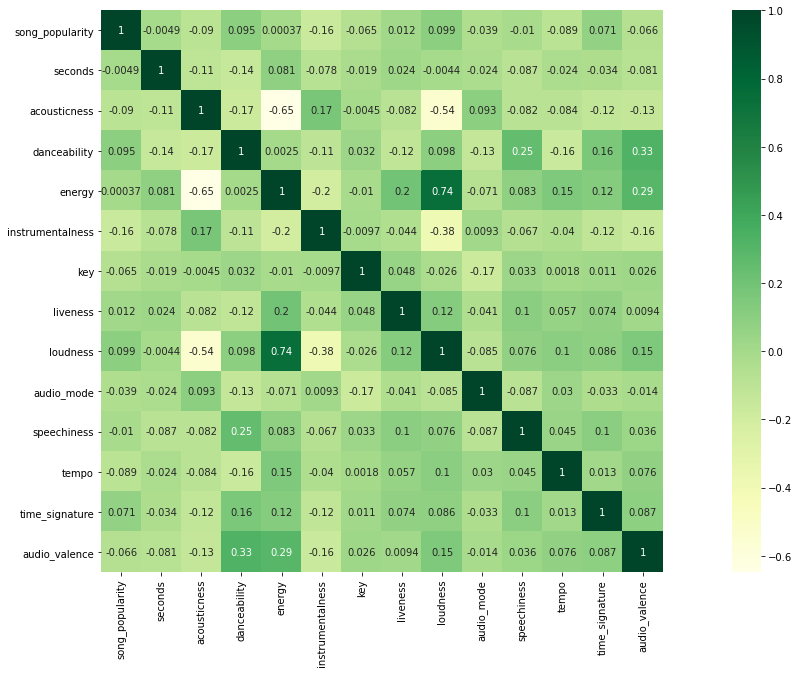

In [ ]:
# correlation chart with all variables - features + target
import matplotlib.pyplot as plt
import seaborn as sns
#corr = sample_df.corr()
#corr.style.background_gradient(cmap="YlGn")
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(sample_df.corr(), annot=True, square=True, 
            cmap=plt.get_cmap('YlGn'), cbar="False", ax=ax)
plt.subplots_adjust(bottom=0.10)
ax.set_yticklabels(ax.get_yticklabels(), rotation='horizontal')
plt.savefig("correlation.png")

<center><h7>Description of Scatter Matrix<h7/><center> 

<center>The following scatterplots gave more insight into the relationships among the features in this dataset. Some features such as Energy and Loudness and Acousticness and Loudness seem to have linear/exponential relationships. However, the vast mojority of variables do not seem to have strong linear correlations with one another. In addition, the scatter matrix makes it abundntly clear that we the data points across the different categories tend to behave in very similar fashions.<center/>
    

In [ ]:
#scatter matrix of 6 features against each other 
# visualization of correlations from above 

import plotly.express as px
fig = px.scatter_matrix(sample_df, dimensions = rfe_columns, color = 'rating', hover_name = 'song_name')
fig.show()

<center><h7>Description of Box Plots<h7/><center> 

<center>The boxplots allowed for an enhanced understanding about the spread of the data for the individual features and how they compare to the other target variables. The data points for each target variable- very, moderately, and unpopular had fairly similar distributions for each of the target variables included in the analysis.<center/>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



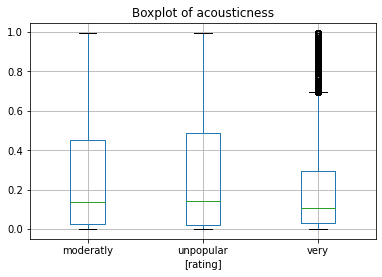

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 432x288 with 0 Axes>

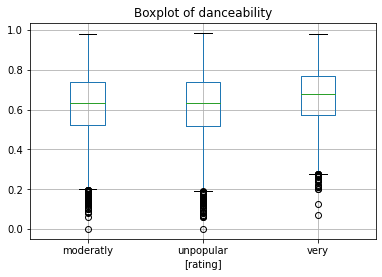

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 432x288 with 0 Axes>

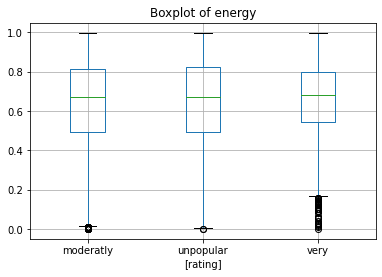

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 432x288 with 0 Axes>

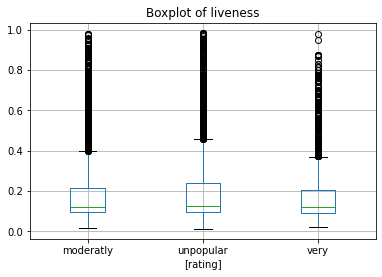

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 432x288 with 0 Axes>

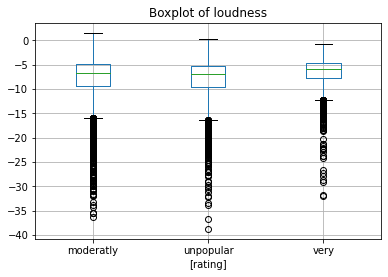

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 432x288 with 0 Axes>

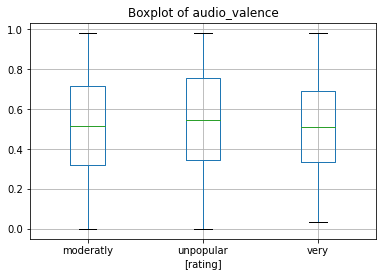

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
box_plots = rfe_columns
def popularity_var(variable):
    graph = df.boxplot(column=[variable], by=['rating'])
    plt.title("Boxplot of " + variable)
    # get rid of the automatic 'Boxplot grouped by group_by_column_name' title
    plt.suptitle("")
    plt.figure(figsize=(10,10))
    plt.show()
    plt.savefig("box_plot"+ variable)
for i in box_plots:
    popularity_var(i)


In [ ]:
df_numbers = df.iloc[:, 1:]

In [ ]:
df_numbers.groupby('rating').agg(['count', 'mean', 'std', 'sem'])

song_popularity                                 seconds              \
                    count       mean        std       sem   count        mean   
rating                                                                          
moderatly            7147  59.437526   5.715854  0.067611    7147  217.042255   
unpopular            7237  30.632583  14.975648  0.176038    7237  219.030399   
very                 4451  78.996630   7.590576  0.113775    4451  218.745900   

                               acousticness                                \
                 std       sem        count      mean       std       sem   
rating                                                                      
moderatly  58.265566  0.689208         7147  0.272559  0.301949  0.003572   
unpopular  67.724452  0.796097         7237  0.277155  0.299974  0.003526   
very       47.616086  0.713715         4451  0.205759  0.237503  0.003560   

          danceability                               energy            \
                 count      mean       std       sem  count      mean   
rating                                                                  
moderatly         7147  0.624083  0.157183  0.001859   7147  0.634940   
unpopular         7237  0.622085  0.159688  0.001877   7237  0.644785   
very              4451  0.666539  0.146182  0.002191   4451  0.661480   

                              instrumentalness                                \
                std       sem            count      mean       std       sem   
rating                                                                         
moderatly  0.228699  0.002705             7147  0.087348  0.236877  0.002802   
unpopular  0.217704  0.002559             7237  0.106257  0.252038  0.002963   
very       0.180320  0.002703             4451  0.017081  0.096281  0.001443   

            key                               liveness                      \
          count      mean       std       sem    count      mean       std   
rating                                                                       
moderatly  7147  5.381699  3.614984  0.042761     7147  0.176914  0.144058   
unpopular  7237  5.285477  3.569886  0.041964     7237  0.186381  0.148641   
very       4451  5.146709  3.681695  0.055185     4451  0.173100  0.135505   

                    loudness                               audio_mode  \
                sem    count      mean       std       sem      count   
rating                                                                  
moderatly  0.001704     7147 -7.710141  4.237183  0.050120       7147   
unpopular  0.001747     7237 -7.802719  3.812272  0.044813       7237   
very       0.002031     4451 -6.447939  2.869713  0.043014       4451   

                                        speechiness                      \
               mean       std       sem       count      mean       std   
rating                                                                    
moderatly  0.642088  0.479420  0.005671        7147  0.098164  0.101439   
unpopular  0.624568  0.484268  0.005693        7237  0.102463  0.108519   
very       0.611548  0.487453  0.007306        4451  0.107827  0.101882   

                    tempo                                  time_signature  \
                sem count        mean        std       sem          count   
rating                                                                      
moderatly  0.001200  7147  120.379768  29.059579  0.343738           7147   
unpopular  0.001276  7237  121.923185  29.148828  0.342643           7237   
very       0.001527  4451  120.804441  27.385798  0.410484           4451   

                                        audio_valence                      \
               mean       std       sem         count      mean       std   
rating                                                                      
moderatly  3.959004  0.307338  0.003635          7147  0.516722  0.247915   
unpopular 

<center><h7>Description of Scatter Plots<h7/><center> 

<center>We made the following scatter plots to understand how each of the features affected the popularity rating of the song. We uncovered that there were no significant linear or logistic relationships between the two variables. In fact, the data set seems to show zero to low correlation between popularity and the variables plottted.<center> 



In [ ]:
for name in rfe_columns:
    fig = px.scatter(df, x = name, y = 'song_popularity', hover_name = 'song_name',
                     template = 'ggplot2', color = 'song_popularity',
                     color_continuous_scale = 'algae')

    fig.update_xaxes(title_font = {'size' : 18, 'family' : 'Courier', 'color' : 'gray'},
                     tickfont = {'size' : 16, 'family' : 'Courier', 'color' : 'gray'})

    fig.update_yaxes(title_font = {'size' : 18, 'family' : 'Courier', 'color' : 'gray'},
                     tickfont = {'size' : 16, 'family' : 'Courier', 'color' : 'gray'})
    fig.show()

### 3.3. Model Construction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# Dictionary of untuned classification algorithms
estimators = {
    'k-nearest neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Gaussian Naive Bayes' : GaussianNB(priors = None, var_smoothing = 1e-09),
    'Support Vector Machine' : LinearSVC(),
}

In [ ]:
#percentage-split method
def classifiers_percentage_split():
    
    for estimator_name, estimator_object in estimators.items():
        
        model = estimator_object
        model.fit(X_train, y_train)
        training_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        
        print(estimator_name)
        print('\t' + f'Prediction accuracy on the training data: {training_accuracy: .2%}')
        print('\t' + f'Prediction accuracy on the test data: {test_accuracy: .2%}\n')

In [ ]:
# tests the performance for each of the following datasets: untuned, minmax scaler, and standard scaler
for scaler_name, scaler_data in all_data.items():
    
    print(scaler_name, '\n-----------------\n')
    
    X_train, X_test, y_train, y_test = split_data(scaler_data, target)
    
    classifiers_percentage_split()

UNSCALED FEATURES 
-----------------

k-nearest neighbors
	Prediction accuracy on the training data:  65.38%
	Prediction accuracy on the test data:  48.40%

Decision Tree
	Prediction accuracy on the training data:  99.32%
	Prediction accuracy on the test data:  57.80%

Gaussian Naive Bayes
	Prediction accuracy on the training data:  35.39%
	Prediction accuracy on the test data:  35.08%



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Support Vector Machine
	Prediction accuracy on the training data:  37.94%
	Prediction accuracy on the test data:  38.03%

STANDARD SCALER 
-----------------

k-nearest neighbors
	Prediction accuracy on the training data:  66.66%
	Prediction accuracy on the test data:  49.39%

Decision Tree
	Prediction accuracy on the training data:  99.32%
	Prediction accuracy on the test data:  58.42%

Gaussian Naive Bayes
	Prediction accuracy on the training data:  35.39%
	Prediction accuracy on the test data:  35.08%

Support Vector Machine
	Prediction accuracy on the training data:  42.98%
	Prediction accuracy on the test data:  41.07%

MINMAX SCALER 
-----------------

k-nearest neighbors
	Prediction accuracy on the training data:  66.64%
	Prediction accuracy on the test data:  48.95%

Decision Tree
	Prediction accuracy on the training data:  99.32%
	Prediction accuracy on the test data:  59.12%

Gaussian Naive Bayes
	Prediction accuracy on the training data:  35.39%
	Prediction accuracy on the te

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
from sklearn.metrics import classification_report

for estimator_name, estimator_object in estimators.items():
    class_report = classification_report(y_true = y_test, y_pred = estimator_object.predict(X = X_test))
    print(estimator_name + '\n-----------------------\n' + class_report + '\n\n')

k-nearest neighbors
-----------------------
              precision    recall  f1-score   support

   moderatly       0.46      0.53      0.50      1791
   unpopular       0.48      0.45      0.47      1786
        very       0.57      0.48      0.52      1132

    accuracy                           0.49      4709
   macro avg       0.50      0.49      0.49      4709
weighted avg       0.49      0.49      0.49      4709



Decision Tree
-----------------------
              precision    recall  f1-score   support

   moderatly       0.57      0.56      0.57      1791
   unpopular       0.57      0.53      0.55      1786
        very       0.65      0.74      0.69      1132

    accuracy                           0.59      4709
   macro avg       0.60      0.61      0.60      4709
weighted avg       0.59      0.59      0.59      4709



Gaussian Naive Bayes
-----------------------
              precision    recall  f1-score   support

   moderatly       0.40      0.16      0.23      179

**Model Evaluation:**

* **k-Nearest Neighbors Classifier:**
     * Test Set Accuracy: ~ 49%
     * Evaluation: The k-Nearest Neighbors Classifier had an approximate 49.39% accuracy on the test set, and a 66.66% accuracy on the training data. This is indicative of mild overfitting of the training data. There was a significant difference between the two values. This algorithm has a lot of potential for improvement if we can tune parameters such as the k value and the metric for determining which points are closer. The F1 scores for unpopular, moderatley, and very were 0.47, 0.50, 0.52 respectively. This tells us that both the precision and recall were fairly low. Tuning will help minimize the chance of not detecting a positive case and minimize the number of false positives.
     
* **Decision Tree Classifier:**    
     * Test Set Accuracy: ~ 58%
     * Evaluation: The Decision Tree Classifier had an approximate 58.99% accuracy on the test set, and a 99.32% accuracy in the training data. This is indicative of massive overfitting of the training data as there was a significant difference between the two values. This algorithm has a lot of potential for improvement if we can tune parameters such as the splitter and criterion. We need to loosen the fit of the data by optimizing these values. The F1 scores for unpopular, moderatley, and very were 0.56, 0.55, and 0.69 respectively. This tells us that both the precision and recall are quite low but the F1 score for the 'Very Popular' category was higher than that of the k-Nearest Neighbor Classifier. Tuning will help minimize the chance of not detecting a positive case and minimize the number of false positives.
       
* **Naive Bayes**:
     * Test Set Accuracy: ~ 35%
     * Evaluation: The Naive Bayes Classifier performed with a very poor accuracy and had low F1 scores across the board. The Training and Test Set accuracies were approximatly the same indicating that there was no significant underfitting or overfitting of the model. Tuning this algorithm would not provide any benefits for this reason.

* **Support Vector Machine**:
     * Test Set Accuracy: ~ 41%
     * Evaluation: The Support Vector Machine Classifier performed with a very poor accuracy and had low F1 scores across the board. The Training and Test Set accuracies were approximatly the same indicating that there was no significant underfitting or overfitting of the model. Tuning this algorithm would not provide any benefits for this reason.


**Hypotheses Evaluation:**

* **Hypothesis about features relating to popularity:**
     * Null: Neither danceability, energy, or instrumentalness is associated with a high popularity rating.
     * Alternative: Either danceability, energy, or instrumentalness is associated with a high popularity rating.
     * Evaluation: According to the correlation matrix that we constructed, danceability, energy, and instrumentalness have the pearson correaltion coefficeints of 0.09467, 0.00037, and -0.161584 respectively when plotted against popularity rating. This is indicative of very low correlation between each of the variables and popularity. In addition, the scatter plot showed that there was no observable exponential or logistic relationship between each of the varibles and popularity. Based on the data, we would fail to reject the null hypothesis.
     
* **Hypothesis about features relating to one another:**    
     * Null: There is no strong linear correlation between loudness and energy.
     * Alternative: There is a strong linear correlation between loudness and energy.
     * Evaluation: According to the correlation matrix that we constructed, loudness and energy had a correaltion coefficient of 0.74368. This is indicative of a strong linear relationship between the two features. The notion that loudness and energy are generally positively associated with one another is supported by this data. Although, the scatter matrix does suggest that the two varibles can be better modeled with a logistic curve, we can reject the null hypothesis. There is a strong linear correaltion between loudness and energy.
       
* **Hypothesis about machine learning algorithms**:
     * Null: The k-Nearest Neighbor Algorithm is the best predictor for classifying song predictability
     * Alternative: The k-Nearest Neighbor Algorithm is not the best predictor for classifying song predictability
     * Evaluation: According to the class report, the Decision Tree Classifier has ann accuracy of 59% whereas the k-Nearest Neighbor Classifier only has an accuracy of 49%. In addition, the reported statistics indicate that the Decsion Tree Classifier is massively overfitted as the training set accuracy is 99.32% whereas the testing set accuracy is 58.38%. Similarly the k-Nearest Neighbor Algorithm is quite overfitted as the the training set accuracy is 66.66% whereas the testing set accuracy is 49.39%. Although both algorithms have potential for significant improvement, at this stage the Decision Tree Classifier is the better predictor for classifying song predictability. Therefore we can reject the Null Hypothesis.

* **Hypothesis about scaling the algorithms**:
     * Null: Scaling the features with Standard Scaler will result in the same increase in performance for the Support Vector Machine Classifier and the K-Nearest Neighbor Classifier
     * Alternative: Scaling the features with Standard Scaler will not result in the same increase (> 1% difference) in performance for the Support Vector Machine Classifier and the K-Nearest Neighbor Classifier
     * Evaluation: The reported statistics indicate that after using Stanrd Scaler, the performance of the Support Vector Machine Classifier increased from 37.93% to 41.07% on the testing data. On the other hand, the performance of the K-Nearest Neighbor Classifier increased from 48.40% to 49.39% on the testing data. The effect of scaling had a larger impact for the SVM Classifier. Therefore, we can reject the null hypothesis.
       

### 3.5. Model Optimization

**Choosing the Best Predicitve Models**

* **k-Nearest Neighbors Classifier:**
     * The training and testing accuracies are indicative of mild overfitting of the training data. Since, there was a significant difference between the two values, this algorithm has a lot of potential for improvement. We can tune the parameters such as the number of nearest neighbors and the metric for determining which points are closer. We accomplished this task underfitting the model through the use of Grid Search.
     
     
* **Decision Tree Classifier:**
    * The training and testing accuracies are indicative of massive overfitting of the training data. Since, there was a very significant difference between the two values, this algorithm has a lot of potential for improvement. We can tune the following parameters: criterion, splitter, max_feaures, and minimum samples to split in order to improve both the precision and accuracy of the algorithm. We accomplished the task of underfitting the model through the use of Grid Search.


<center> <h2>Grid Search</h2></center>

In [ ]:
# Standard Scaler had the best overall performance
X_train, X_test, y_train, y_test = split_data(features_standard_scaled, target)

<center> <h3>Algorithm: kNN Classifier </h3></center>

In [ ]:
param_grid_knn = {'n_neighbors' : [3, 5, 7, 10], 'weights' : ['uniform', 'distance']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv = 5)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X = X_train, y = y_train)

#result of grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#the performance of the best found parameters on the test set
#this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test, y_test))

Best parameters:  {'n_neighbors': 10, 'weights': 'distance'}
Best cross-validation score:  0.5553586482034709
Test set score:  0.5744319388405181


<center> <h3>Algorithm: Decision Tree Classifier </h3></center>

In [ ]:
param_grid_dtc = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'],
                  'max_features' : [None, 'auto', 'sqrt', 'log2'], 'min_samples_split' : [2, 3, 4]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv = 5)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X = X_train, y = y_train)

#result of grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#the performance of the best found parameters on the test set
#this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test, y_test))

Best parameters:  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score:  0.5583318490126448
Test set score:  0.5767678912720323


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# the estimators dictionary is updated with the two tuned algorithmns that performed the best
estimators = {
    'k-nearest neighbors' : KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                                                 metric_params = None, n_jobs = None, n_neighbors = 10, p = 2,
                                                 weights = 'distance'),
    
    'Decision Tree' : DecisionTreeClassifier(class_weight = None, criterion = 'entropy', max_depth = None,
                                             max_features = 'log2', max_leaf_nodes = None,
                                             min_impurity_decrease = 0.0, min_impurity_split = None,
                                             min_samples_leaf = 1, min_samples_split = 2,
                                             min_weight_fraction_leaf = 0.0,
                                             random_state = None, splitter = 'random')
}

### 3.6. Model Testing


<h4>Technique: Using Percentage Split </h4>

In [ ]:
classifiers_percentage_split()

k-nearest neighbors
	Prediction accuracy on the training data:  99.32%
	Prediction accuracy on the test data:  57.44%

Decision Tree
	Prediction accuracy on the training data:  99.32%
	Prediction accuracy on the test data:  57.49%



<h4>Technique: Using Cross Validation </h4>

In [ ]:
estimators

{'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='log2', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='random'),
 'k-nearest neighbors': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='distance')}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def classifiers_cross_validation():

    for estimator_name, estimator_object in estimators.items():

        kfold = KFold(n_splits = 10, random_state = 3000, shuffle = True)
        scores = cross_val_score(estimator = estimator_object, X = features, y = target, cv = kfold)
        print(estimator_name + ':\n\t' + f'Mean Accuracy = {scores.mean():.2%}, ',
              f'Standard Deviation = {scores.std():.2%}' + '\n')

In [ ]:
classifiers_cross_validation()

k-nearest neighbors:
	Mean Accuracy = 59.73%,  Standard Deviation = 1.27%

Decision Tree:
	Mean Accuracy = 60.18%,  Standard Deviation = 1.02%



<h4>Understanding the Performance with Confusion Matrices </h4>

In [ ]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                           metric_params = None, n_jobs = None, n_neighbors = 10, p = 2,
                           weights = 'distance')

knn.fit(X = X_train, y = y_train)

predicted = knn.predict(X = X_test)

expected = y_test


confusion = confusion_matrix(y_true = expected, y_pred = predicted)

In [ ]:
confusion_df = pd.DataFrame(confusion, index = ['moderatly', 'unpopular', 'very'],
                            columns = ['moderatly', 'unpopular', 'very'])
confusion_df

moderatly  unpopular  very
moderatly        958        564   269
unpopular        652        916   218
very             152        149   831

<center>The following confusion matrix gives more insight into how the different target values were categorized. This tells us that the frequency at which moderate and unpopular songs were mistaken for each other was very significant. The distinction between 'Very Popular' and the other two categories was more clear.<center/>

In [ ]:
for estimator_name, estimator_object in estimators.items():
    class_report = classification_report(y_true = y_test, y_pred = estimator_object.predict(X = X_test))
    print(estimator_name + '\n-----------------------\n' + class_report + '\n\n')

k-nearest neighbors
-----------------------
              precision    recall  f1-score   support

   moderatly       0.54      0.53      0.54      1791
   unpopular       0.56      0.51      0.54      1786
        very       0.63      0.73      0.68      1132

    accuracy                           0.57      4709
   macro avg       0.58      0.59      0.58      4709
weighted avg       0.57      0.57      0.57      4709



Decision Tree
-----------------------
              precision    recall  f1-score   support

   moderatly       0.54      0.53      0.54      1791
   unpopular       0.54      0.51      0.53      1786
        very       0.66      0.74      0.70      1132

    accuracy                           0.57      4709
   macro avg       0.58      0.60      0.59      4709
weighted avg       0.57      0.57      0.57      4709





## 4. DISCUSSION


### Summary of Analysis

In order to analyze our data, we began by splitting our data into the feature and target variables. We scaled our data uning Standard and Minmax Scaler in order to compare the accuracies of the preliminary models with the data. We tested the four main classification algorithms: k-Nearest Neighbor Classifer, Decision Tree Classifier, Support Vector Machine, and Gaussain Naive Bayes. The accuracy of the test and training sets indicated that the k-Nearest Neighbor Classifer and the Decision Tree Classifier were thoroughly overfitting the training data. We proceeded to tune these algorthms in order to loosen the fit on the training data. Through the use of Grid Search, we observed that the accuracy of the testing set data improved significantly on the test data set for the k-Nearest Neighbor. This resulted in a a very similar performance for the k-Nearest Neighbor Classifier and Decision Tree Classifier at around a 60% accuracy on the test data set. This analysis resulted in prediction accuracies that were averagely successful.

### Interpretation of Findings

***Algorithms Compared***

We compared k-Nearest Neighbor Classifier, Decision Tree Classifier, Support Vector Machine, and Gaussian Naive Bayes algorithms

***Algorithms with Best Performance***

The k-Nearest Neighbor Classifier outperformed the Decision Tree Classifier with the best F1 scores and Accuracies on the testing sets:

    k-Nearest Neighbor Classifier
    -----------------------------
    * Accuracy: ~ 57%
    * F1 Score for 'Very Popular': 0.68
    * F1 Score for 'Moderately Popular': 0.54
    * F1 Score for 'UnPopular': 0.54
    
    Decision Tree Classifier
    ------------------------
    * Accuracy: ~ 57%
    * F1 Score for 'Very Popular': 0.68
    * F1 Score for 'Moderately Popular': 0.53
    * F1 Score for 'UnPopular': 0.52
    
***Evaluation after Optimization***

After tuning and optimization, we uncovered a huge improvement in the performace of the k-Nearest Neighbor Classifier. The accuracy of the k-Nearest Neighbor Algorithm increased by a nearly whopping 10%. On the other hand, the Dscision Tree Classifier had a mild improvements in performance. However, for each of the algorithms, the tuned model continued to massively overfitted the training dataset whilst improving the accuracy on the test set data.

***Algorithms for Use in Predictive Model***

We determined that the k-Nearest Neighbor Classifier and Decision Tree had the highest accuracy so we utilized them to perform our predictive model. Based on our results, we determined that the features in our dataset do not give us a complete understanding of the entire music industry as we would have liked it to. Given this reasoning, it seems fair to assume that either of these classifiers can be used to yield a high accuracy rate on the given dataset.
   

### Our Original Research Questions

***Are there specific features that directly correlate to song popularity?***

No, none of the feature variables had a strong positive or negative correlation to song popularity.

***Which feature variables are more indicative of projected song popularity?***

Using RFE, we conducted a feature selection and found that acousticness, danceability, energy, liveness, and loudness were the most indicative features of song popularity. 

***Will the accuracy of our predictions increase when we recursively eliminate features? Will certain algorithms perform better when there are more features in evaluation?***

We tried testing it on 4, 5, 6, and 7 features and found that 6 features resulted in algorithms that performed better. 

***A popularity of a song is dependent on a vast number of features that can be very difficult. Given the features that we do take into account, will knn work significantly better than a Decision Tree Classifier or a Support Vector Machine Classifier?***

After performing cross-validation, we found that the accuracy of k-Nearest Neighbors was slightly higher than the Decision Tree Classifier. 


***Reflection on our Findings***

Going back to our original project topic, we wanted to determine whether there were any relationships between our feature variables and song popularity. We were surprised to find that there were no strong correlations. 

However, when conducting our model, we actually found that when using six feature variables, there was a fairly high accuracy of 60% using the k-Nearest Neighbor algorithm. 


### Conclusion

One way to have more accurate results would be to increase the number of feature variables. We only used feature variables that were given to us by Spotify, but if we added more variables such as social media response time to songs or number of tweets about a specific song, we may have found a higher accuracy for our predictive model.

In addition to this, when looking up past research, we found many predictability models that used regression instead of classification. We would be curious to see if we kept song_popularity as a continuous variable, instead of classifying it into 3 buckets, would accuracy be higher? This is something we’d love to conduct in the future.